In [ ]:
pip install pandas numpy matplotlib scikit-learn tensorflow statsmodels


In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 로드 및 전처리
file_path = '/content/Baltic_Dry_Index_Historical_Data.csv'
df = pd.read_csv(file_path)
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
bdi_data = df[['Price']]

# 데이터 정규화
scaler = MinMaxScaler()
bdi_data['Price'] = scaler.fit_transform(bdi_data)

# 데이터셋 생성 함수
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 12
dataset = bdi_data.values
trainX, trainY = create_dataset(dataset, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

<ipython-input-108-5c50cf6b562b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdi_data['Price'] = scaler.fit_transform(bdi_data)


In [112]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=4, verbose=2)

Epoch 1/100
898/898 - 4s - loss: 0.0020 - 4s/epoch - 4ms/step
Epoch 2/100
898/898 - 2s - loss: 3.7089e-04 - 2s/epoch - 2ms/step
Epoch 3/100
898/898 - 2s - loss: 2.6251e-04 - 2s/epoch - 2ms/step
Epoch 4/100
898/898 - 3s - loss: 2.0996e-04 - 3s/epoch - 3ms/step
Epoch 5/100
898/898 - 2s - loss: 1.8478e-04 - 2s/epoch - 2ms/step
Epoch 6/100
898/898 - 2s - loss: 1.6857e-04 - 2s/epoch - 2ms/step
Epoch 7/100
898/898 - 2s - loss: 1.6350e-04 - 2s/epoch - 2ms/step
Epoch 8/100
898/898 - 2s - loss: 1.5019e-04 - 2s/epoch - 2ms/step
Epoch 9/100
898/898 - 2s - loss: 1.4303e-04 - 2s/epoch - 2ms/step
Epoch 10/100
898/898 - 2s - loss: 1.3253e-04 - 2s/epoch - 3ms/step
Epoch 11/100
898/898 - 3s - loss: 1.3488e-04 - 3s/epoch - 3ms/step
Epoch 12/100
898/898 - 2s - loss: 1.1925e-04 - 2s/epoch - 2ms/step
Epoch 13/100
898/898 - 2s - loss: 1.1915e-04 - 2s/epoch - 2ms/step
Epoch 14/100
898/898 - 2s - loss: 1.1972e-04 - 2s/epoch - 2ms/step
Epoch 15/100
898/898 - 2s - loss: 1.0744e-04 - 2s/epoch - 3ms/step
Epoch 16

In [113]:
# 현재 입력 데이터의 형태를 확인
print(trainX.shape)  # (None, 1, 12)

# trainX의 첫 번째 샘플을 예측의 초기 입력으로 사용
current_step = trainX[0].reshape(1, 1, look_back)  # 첫 번째 샘플 선택, 현재 형태는 (1, 1, 12)

# 예측값을 저장할 리스트 초기화
predictions = []

# LSTM 모델 예측 루프
for _ in range(12):
    next_pred = model.predict(current_step)
    predictions.append(next_pred[0, 0])
    current_step = np.append(current_step[:, :, 1:], np.reshape(next_pred, (1, 1, 1)), axis=2)

print(predictions)

(3592, 1, 12)
1/1 [==============================] - 0s 22ms/step
[0.53845304, 0.5357462, 0.5374328, 0.5409981, 0.5454532, 0.55004257, 0.55530626, 0.56081414, 0.56602234, 0.57130617, 0.57717115, 0.5834587]


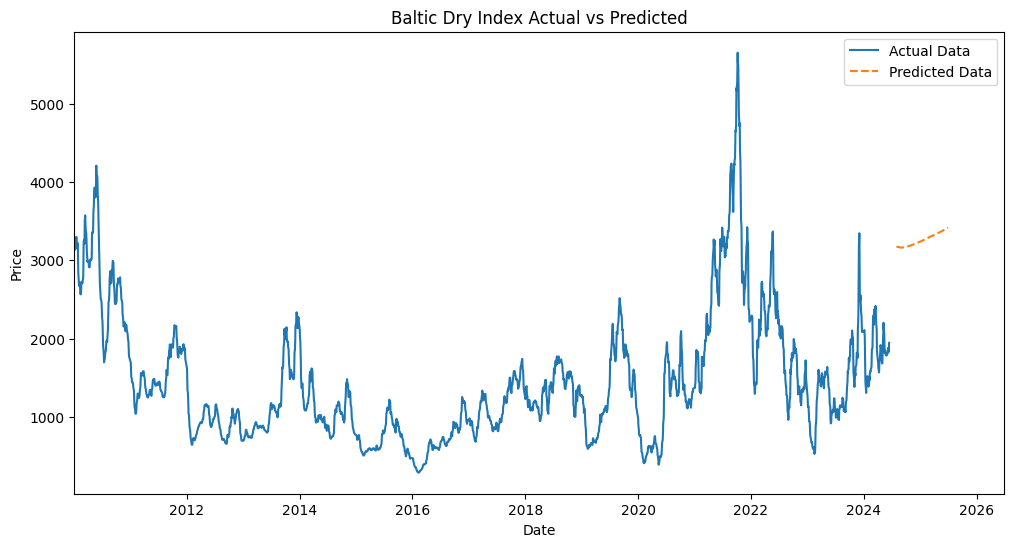

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 기존 데이터의 마지막 날짜를 가져옴
last_date = bdi_data.index[-1]

# 12개의 예측값에 대한 날짜 생성 (월 단위로 가정)
prediction_dates = pd.date_range(start=last_date, periods=13, freq='M')[1:]

# 예측 결과를 실제 데이터 범위로 역변환
predictions_inverse = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 실제 데이터와 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(bdi_data.index, scaler.inverse_transform(bdi_data), label='Actual Data')
plt.plot(prediction_dates, predictions_inverse, label='Predicted Data', linestyle='--')
plt.title('Baltic Dry Index Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# x축을 2025년까지 확장
plt.xlim([bdi_data.index[0], pd.Timestamp('2026-06-30')])

plt.show()


In [55]:
pip install arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 9.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-101-02a598fa4e7f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdi_data['Returns'] = np.log(bdi_data['Price'] / bdi_data['Price'].shift(1))


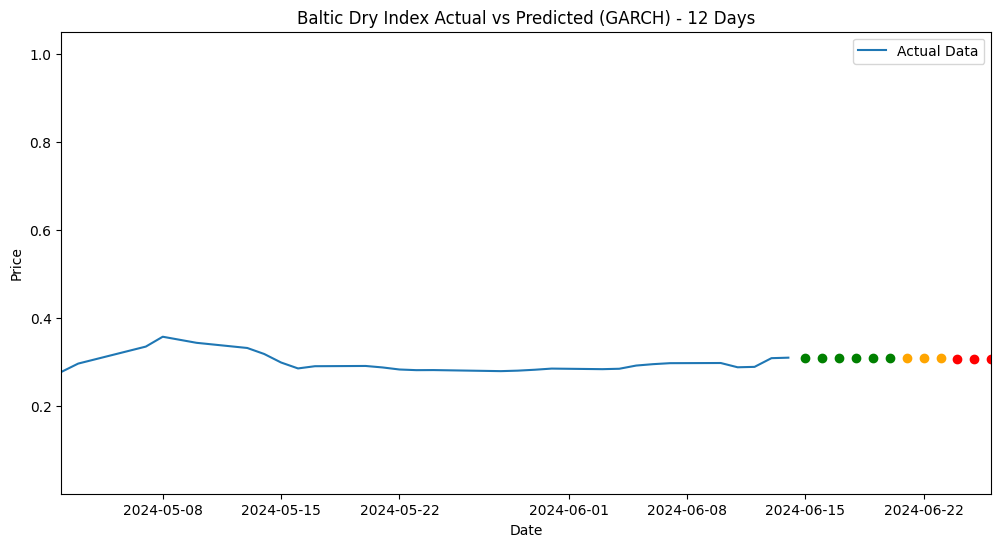

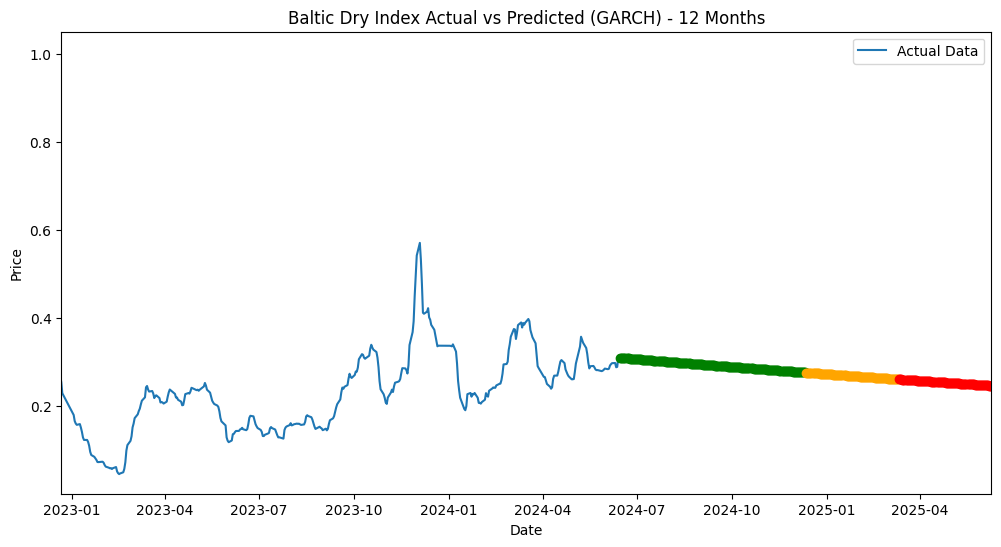

12일 예측 데이터:
         Date  Predicted Price  Volatility    Risk
0  2024-06-15         0.309131    3.175029     Low
1  2024-06-16         0.308933    3.566663     Low
2  2024-06-17         0.308736    3.892836     Low
3  2024-06-18         0.308539    4.170891     Low
4  2024-06-19         0.308341    4.411636     Low
5  2024-06-20         0.308144    4.622401     Low
6  2024-06-21         0.307947    4.808455  Medium
7  2024-06-22         0.307751    4.973750  Medium
8  2024-06-23         0.307554    5.121353  Medium
9  2024-06-24         0.307358    5.253703    High
10 2024-06-25         0.307161    5.372780    High
11 2024-06-26         0.306965    5.480224    High

12개월 예측 데이터:
          Date  Predicted Price  Volatility  Risk
0   2024-06-15         0.309131    3.175029   Low
1   2024-06-16         0.308933    3.566663   Low
2   2024-06-17         0.308736    3.892836   Low
3   2024-06-18         0.308539    4.170891   Low
4   2024-06-19         0.308341    4.411636   Low
..         

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# 데이터 로드 및 전처리 (이미 수행했으므로 생략)

# 'Price' 열의 로그 수익률 계산
bdi_data['Returns'] = np.log(bdi_data['Price'] / bdi_data['Price'].shift(1))

# NaN 및 무한대 값 제거
bdi_data = bdi_data.replace([np.inf, -np.inf], np.nan).dropna()

# 데이터 스케일 조정
bdi_data['Returns'] *= 100

# GARCH 모델 설정 및 학습
am = arch_model(bdi_data['Returns'], vol='Garch', p=1, q=1)
res = am.fit(disp='off')

# 예측 (12일)
forecast_horizon = 12
forecast = res.forecast(horizon=forecast_horizon, reindex=False)
predicted_variance = forecast.variance[-1:]
predicted_mean = forecast.mean[-1:]

# 예측 결과를 실제 데이터 범위로 역변환
predicted_returns = predicted_mean.values.flatten() / 100  # 스케일 조정 후 원래 값으로 복원
predicted_prices = [bdi_data['Price'].iloc[-1]]
predicted_volatility = np.sqrt(predicted_variance.values.flatten())

for return_value in predicted_returns:
    next_price = predicted_prices[-1] * np.exp(return_value)
    predicted_prices.append(next_price)

# 위험도 분류
def classify_risk(volatility, thresholds):
    if volatility > thresholds[1]:
        return 'High'
    elif volatility > thresholds[0]:
        return 'Medium'
    else:
        return 'Low'

# 12일 예측에 대한 위험 임계값 설정
risk_thresholds_12_days = np.percentile(predicted_volatility, [50, 75])
predicted_risk_12_days = [classify_risk(vol, risk_thresholds_12_days) for vol in predicted_volatility]

# 예측 결과를 데이터프레임으로 저장 (12일)
prediction_dates = pd.date_range(start=bdi_data.index[-1], periods=forecast_horizon+1, freq='D')[1:]
predicted_df_12_days = pd.DataFrame({'Date': prediction_dates, 'Predicted Price': predicted_prices[1:], 'Volatility': predicted_volatility, 'Risk': predicted_risk_12_days})

# 위험도 구분을 위한 시각화 (12일)
plt.figure(figsize=(12, 6))
plt.plot(bdi_data.index, bdi_data['Price'], label='Actual Data')

# 위험도에 따라 색상 지정
for i in range(forecast_horizon):
    color = 'green' if predicted_risk_12_days[i] == 'Low' else 'orange' if predicted_risk_12_days[i] == 'Medium' else 'red'
    plt.plot(prediction_dates[i], predicted_prices[i+1], marker='o', color=color)

# x축과 y축 범위 조정 (12일 예측 데이터)
plt.xlim([bdi_data.index[-30], prediction_dates[-1]])
plt.ylim([min(bdi_data['Price'].min(), min(predicted_prices)) * 0.95, max(bdi_data['Price'].max(), max(predicted_prices)) * 1.05])

plt.title('Baltic Dry Index Actual vs Predicted (GARCH) - 12 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 예측 (12개월)
forecast_horizon_months = 12 * 30  # 12개월을 일 단위로 변환
forecast_months = res.forecast(horizon=forecast_horizon_months, reindex=False)
predicted_variance_months = forecast_months.variance[-1:]
predicted_mean_months = forecast_months.mean[-1:]

# 예측 결과를 실제 데이터 범위로 역변환
predicted_returns_months = predicted_mean_months.values.flatten() / 100  # 스케일 조정 후 원래 값으로 복원
predicted_prices_months = [bdi_data['Price'].iloc[-1]]
predicted_volatility_months = np.sqrt(predicted_variance_months.values.flatten())

for return_value in predicted_returns_months:
    next_price = predicted_prices_months[-1] * np.exp(return_value)
    predicted_prices_months.append(next_price)

# 12개월 예측에 대한 위험 임계값 설정
risk_thresholds_12_months = np.percentile(predicted_volatility_months, [50, 75])
predicted_risk_12_months = [classify_risk(vol, risk_thresholds_12_months) for vol in predicted_volatility_months]

# 예측 결과를 데이터프레임으로 저장 (12개월)
prediction_dates_months = pd.date_range(start=bdi_data.index[-1], periods=forecast_horizon_months+1, freq='D')[1:]
predicted_df_12_months = pd.DataFrame({'Date': prediction_dates_months, 'Predicted Price': predicted_prices_months[1:], 'Volatility': predicted_volatility_months, 'Risk': predicted_risk_12_months})

# 위험도 구분을 위한 시각화 (12개월)
plt.figure(figsize=(12, 6))
plt.plot(bdi_data.index, bdi_data['Price'], label='Actual Data')

# 위험도에 따라 색상 지정
for i in range(forecast_horizon_months):
    color = 'green' if predicted_risk_12_months[i] == 'Low' else 'orange' if predicted_risk_12_months[i] == 'Medium' else 'red'
    plt.plot(prediction_dates_months[i], predicted_prices_months[i+1], marker='o', color=color)

# x축과 y축 범위 조정 (12개월 예측 데이터)
plt.xlim([bdi_data.index[-365], prediction_dates_months[-1]])
plt.ylim([min(bdi_data['Price'].min(), min(predicted_prices_months)) * 0.95, max(bdi_data['Price'].max(), max(predicted_prices_months)) * 1.05])

plt.title('Baltic Dry Index Actual vs Predicted (GARCH) - 12 Months')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 예측 데이터 출력
print("12일 예측 데이터:")
print(predicted_df_12_days)

print("\n12개월 예측 데이터:")
print(predicted_df_12_months)
